## Sentiment Analysis

Sentiment analysis is a natural language processing (NLP) technique that involves determining the sentiment or emotion expressed in a piece of text. It's a valuable tool in understanding how people feel about a particular topic, product, service, or even a general text snippet. In this Jupyter Notebook, we'll explore the basics of sentiment analysis using Python and popular NLP libraries like NLTK (Natural Language Toolkit).

How did i do the project
       I have completed this analysis by few steps:
              - Data Download
              - Data Preprocessing
              - Exploratory Data Analysis (EDA)
              - Feature Extraction
              - Model Selection and Training
              - Model Evaluation
              - Cross-validation

## Step01: Modules downloading (You have to download nltk, numpy, pandas, seaborn, re, contractions and sklearn)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import contractions
import nltk 
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk.probability import FreqDist
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix

## Step02: Data Preprocessing 

In [2]:
data = pd.read_csv('Twitter_Data.csv')                                                    # Loading Dataset

data = data.dropna(subset=['category'])

nltk.download('stopwords')     
nltk.download('punkt')
tokenizer = TweetTokenizer()
special_character = r'[^a-zA-Z0-9\s]'
username = r'@\w+'
hash = r'#\w+'
url = r'http\S+'
data['clean_text'] = data['clean_text'].str.replace(special_character, '', regex=True)    #Removing special characters
data['clean_text'] = data['clean_text'].str.replace(username, '', regex=True)             #Removing username 
data['clean_text'] = data['clean_text'].str.replace(hash, '', regex=True)                 #Removing hashes
data['clean_text'] = data['clean_text'].str.replace(url, '', regex=True)                  #Removing urls

duplicates = data.drop_duplicates(subset=['clean_text'])                                  #Removing duplicates
data['clean_text'] = data['clean_text'].str.lower()


def expand_contractions(text):
    if isinstance(text, str):  
        return contractions.fix(text)
    else:
        return text
data['clean_text'] = data['clean_text'].apply(expand_contractions)                        #Removing contraction

stop_words = set(stopwords.words('english'))

def remove_stop_words(text):
    if isinstance(text, str):  # Check if the text is not NaN
        words = text.split()
        filtered_words = [word for word in words if word.lower() not in stop_words]
        return ' '.join(filtered_words)
    else:
        return text

data['clean_text'] = data['clean_text'].apply(remove_stop_words)                         #Removing Stop words

def tokenize_tweet(tweet):
    if isinstance(tweet, str):  # Check if the tweet is not NaN
        return tokenizer.tokenize(tweet)
    else:
        return []
data['clean_text'] = data['clean_text'].apply(tokenize_tweet)                            #Tokenizing the sentences

data.to_csv('Twitter_Data.csv',index=False)

print(data.head())
print(data.info())
print(data.describe())


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Tejha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Tejha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                          clean_text  category
0  [modi, promised, minimum, government, maximum,...      -1.0
1      [talk, nonsense, continue, drama, vote, modi]       0.0
2  [say, vote, modi, welcome, bjp, told, rahul, m...       1.0
3  [asking, supporters, prefix, chowkidar, names,...       1.0
4  [answer, among, powerful, world, leader, today...       1.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162973 entries, 0 to 162972
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162973 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB
None
            category
count  162973.000000
mean        0.225436
std         0.781279
min        -1.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000


## Step03: EDA (Exploratory Data Analysis)

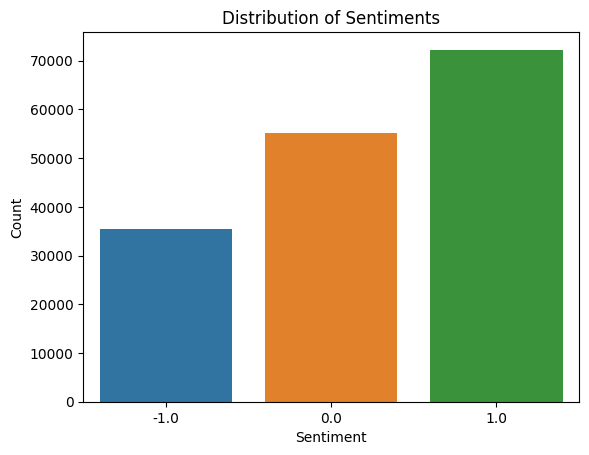

In [3]:
data = pd.read_csv('Twitter_Data.csv')

sns.countplot(data=data,x='category')
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


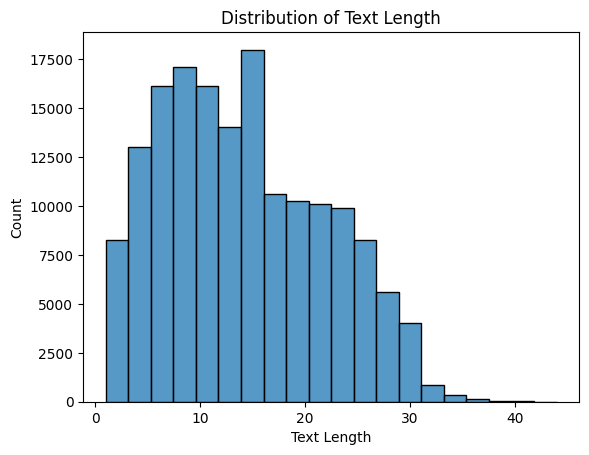

In [4]:
data['category'] = data['clean_text'].apply(lambda x: len(str(x).split()))

sns.histplot(data=data, x='category', bins=20)
plt.title('Distribution of Text Length')
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.show()

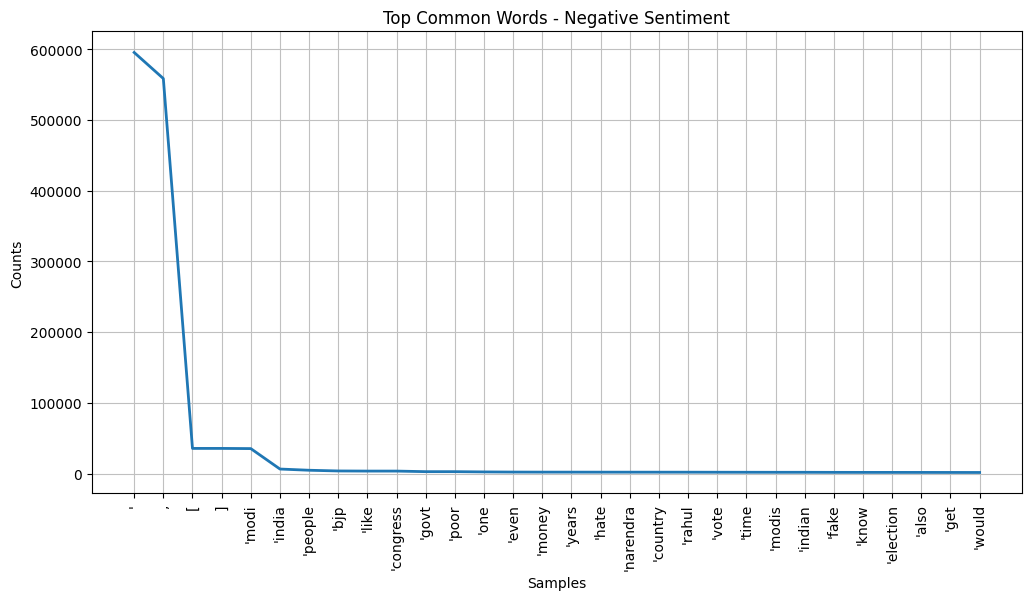

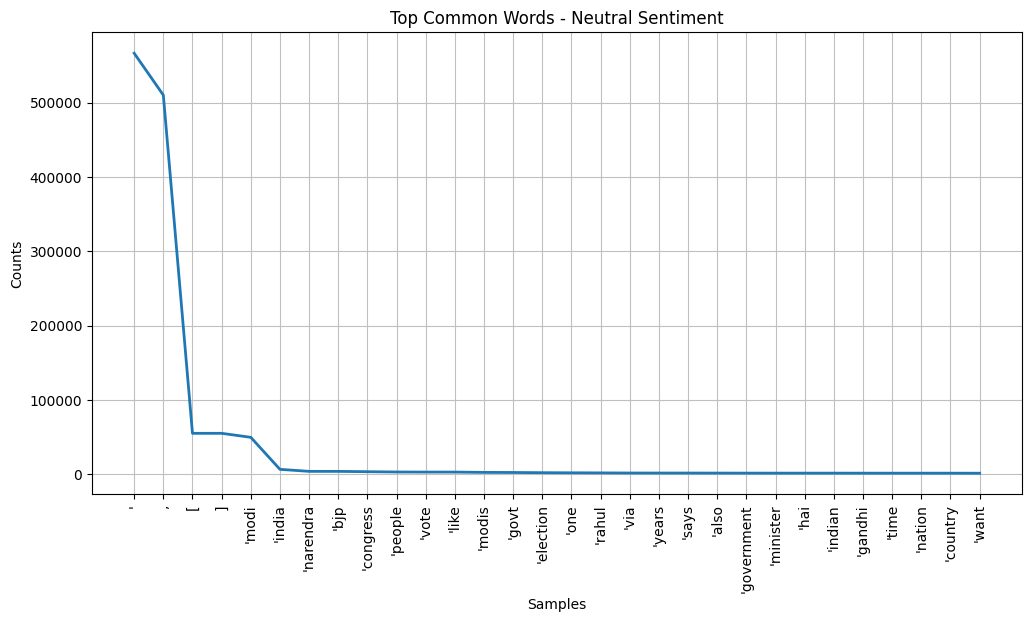

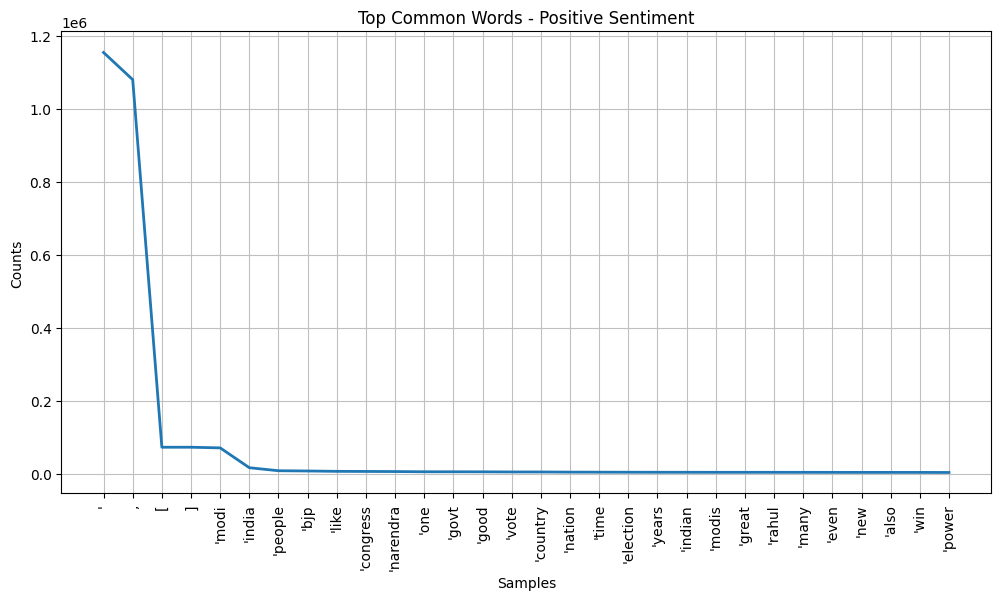

In [5]:
data = pd.read_csv('Twitter_Data.csv')

def preprocess_text(text):
    if isinstance(text, str):
        return text
    elif isinstance(text, int):
        return str(text)  # Convert integers to strings
    else:
        return ""
    
data['clean_text'] = data['clean_text'].apply(preprocess_text)

negative_words = ' '.join(data[data['category'] == -1]['clean_text'])
neutral_words = ' '.join(data[data['category'] == 0]['clean_text'])
positive_words = ' '.join(data[data['category'] == 1]['clean_text'])

fdist_negative = FreqDist(nltk.word_tokenize(negative_words))
fdist_neutral = FreqDist(nltk.word_tokenize(neutral_words))
fdist_positive = FreqDist(nltk.word_tokenize(positive_words))

plt.figure(figsize=(12, 6))
fdist_negative.plot(30, title='Top Common Words - Negative Sentiment')
plt.show()

plt.figure(figsize=(12, 6))
fdist_neutral.plot(30, title='Top Common Words - Neutral Sentiment')
plt.show()

plt.figure(figsize=(12, 6))
fdist_positive.plot(30, title='Top Common Words - Positive Sentiment')
plt.show()

## Step04: Feature Extraction, Model Selection, Training and Evaluation

In [6]:
data = pd.read_csv('Twitter_Data.csv')

vectorizer = CountVectorizer()

# Transform the tokenized and preprocessed text into a feature matrix
X = vectorizer.fit_transform(data['clean_text'])

# Get the corresponding sentiment labels
y = data['category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

n_splits = 5


kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

accuracy_scores = []


for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
  
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
   
    y_pred = model.predict(X_test)
   
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

average_accuracy = np.mean(accuracy_scores)

print("Average Accuracy:", average_accuracy)

Average Accuracy: 0.9048799484390754


## Step05: Cross-validation

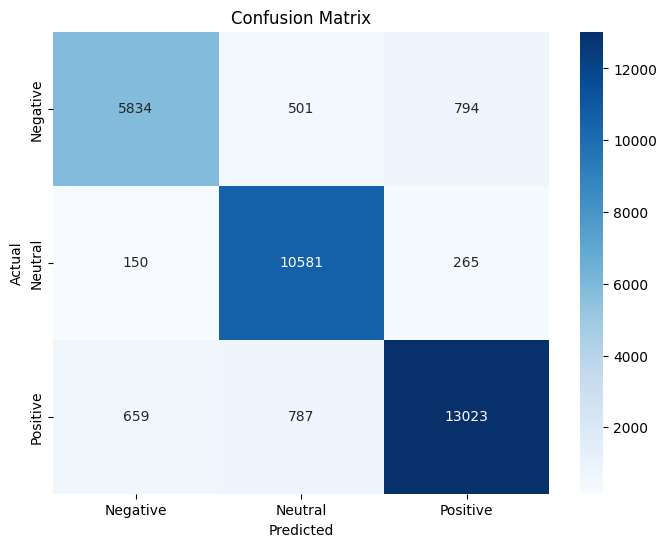

In [7]:
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
